In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [85]:
data='/content/Classified-BioFluidsLab-IITK-JDexperiment.csv'
df=pd.read_csv(data)
df.fillna(df.mean(), inplace=True)
input=df.drop(['E'],axis=1)
target=df['E']
df.head()

,d,B,Q,dT,E
0,1.935247e-09,5.807790,1.771646,15.705398,-3.221133
1,4.758500e-09,5.269716,2.564045,9.550877,0.652858
2,3.686770e-09,3.510369,2.752672,13.793920,5.008998
3,3.033427e-09,4.932127,2.510767,47.348940,-0.819294
4,8.644913e-10,3.650966,1.413866,88.453402,-40.038999


###Membrane Thickness(d)
**Conclusions**

-Normally distributed

-4% values are missing

-No outliers

In [86]:
df['d'].describe()

,d
count,1.000000e+05
mean,2.546699e-09
std,1.384364e-09
min,1.000271e-10
25%,1.373518e-09
50%,2.546699e-09
75%,3.716723e-09
max,4.999961e-09


<Axes: ylabel='Frequency'>

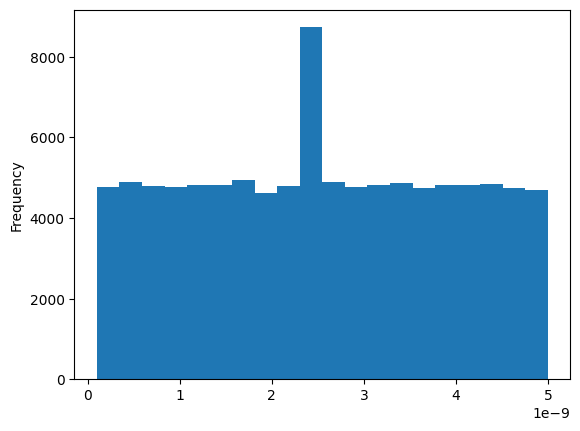

In [87]:
df['d'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

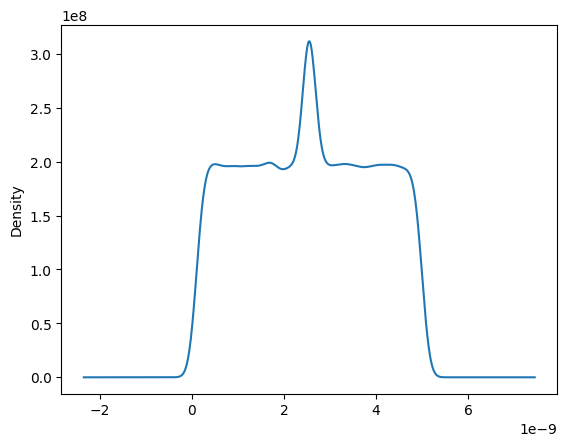

In [88]:
df['d'].plot(kind='kde')

In [89]:
df['d'].skew()

0.0

<Axes: >

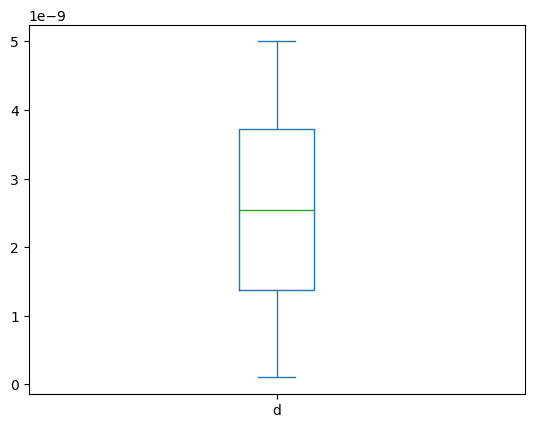

In [90]:
df['d'].plot(kind='box')

In [91]:
df['d'].isnull().sum()/len(df['d'])

0.0

###Energy Flux(E)
**Conclusions**

- +vely skewed
- outliers present
- 4% missing values

In [92]:
df['E'].describe()

,E
count,100000.000000
mean,5.008998
std,290.646288
min,-7995.255638
25%,-2.673292
50%,0.418462
75%,4.925930
max,9240.255065


<Axes: ylabel='Frequency'>

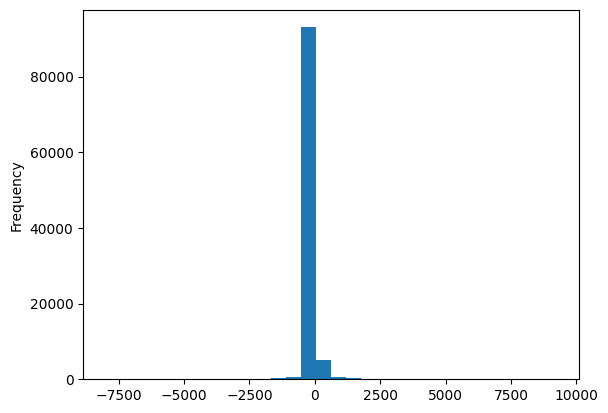

In [93]:
df['E'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

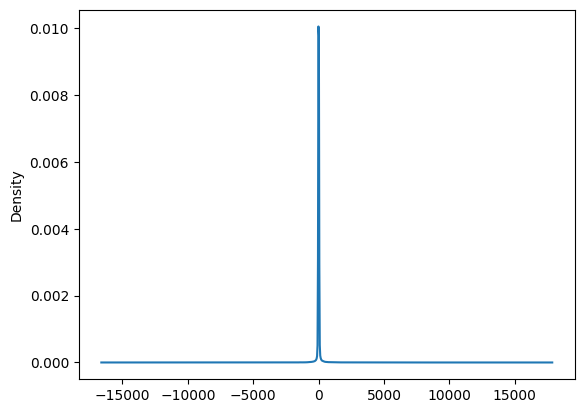

In [94]:
df['E'].plot(kind='kde')

In [95]:
df['E'].skew()

1.7722057331107834

<Axes: >

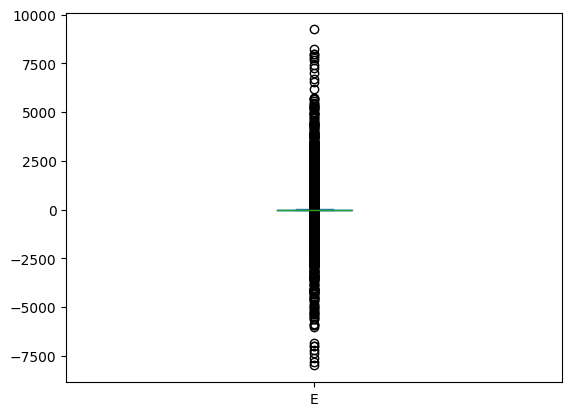

In [96]:
df['E'].plot(kind='box')

In [97]:
df[df['E']>7500]

,d,B,Q,dT,E
7007,2.546699e-09,3.121206,4.672631,87.172674,9240.255065
35903,1.043205e-10,9.523061,3.495239,94.091087,7970.247334
47968,1.070011e-10,3.129973,4.368558,91.844663,8233.308396
76191,1.068024e-10,2.226620,3.397474,98.283008,7997.021609
78965,1.168432e-10,1.630828,4.861934,91.427508,7773.328743
79826,1.026421e-10,2.294814,3.603316,98.195289,7894.880171
87555,1.017237e-10,9.059327,4.978489,78.512165,7684.597562


In [98]:
df['E'].isnull().sum()/len(df['E'])

0.0

In [99]:
df['B'].describe()

,B
count,100000.000000
mean,5.013133
std,2.827973
min,0.000048
25%,2.615430
50%,5.013133
75%,7.406696
max,9.999894


<Axes: ylabel='Frequency'>

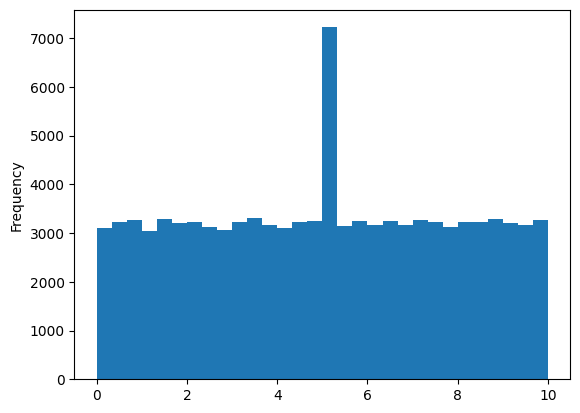

In [100]:
df['B'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

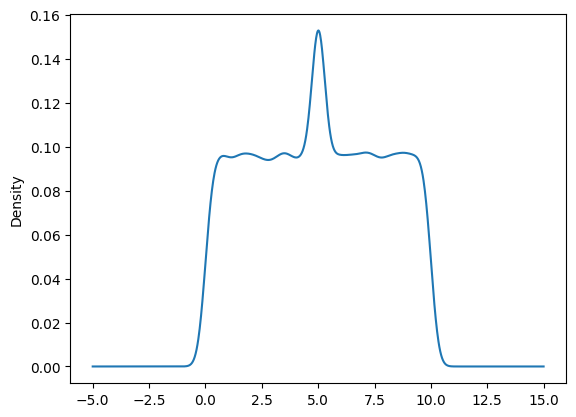

In [101]:
df['B'].plot(kind='kde')

In [102]:
df['B'].skew()

-0.004933610363789925

<Axes: >

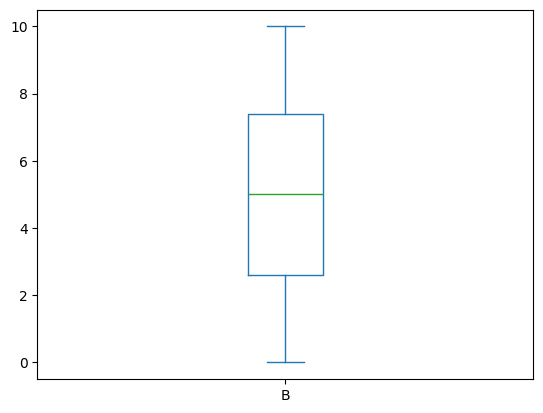

In [103]:
df['B'].plot(kind='box')

In [104]:
df['B'].isnull().sum()/len(df['B'])

0.0

In [105]:
df['Q'].describe()

,Q
count,100000.000000
mean,2.752672
std,1.273227
min,0.500010
25%,1.674125
50%,2.752672
75%,3.831206
max,4.999907


<Axes: ylabel='Frequency'>

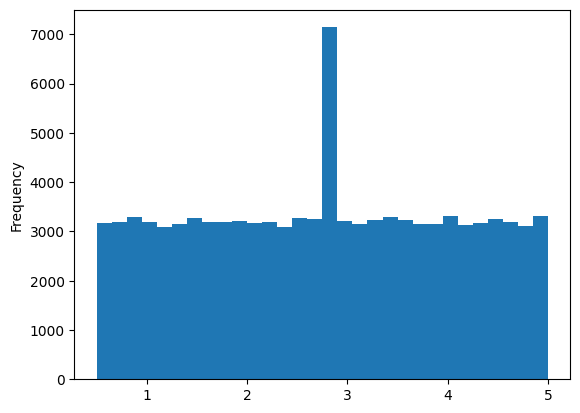

In [106]:
df['Q'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

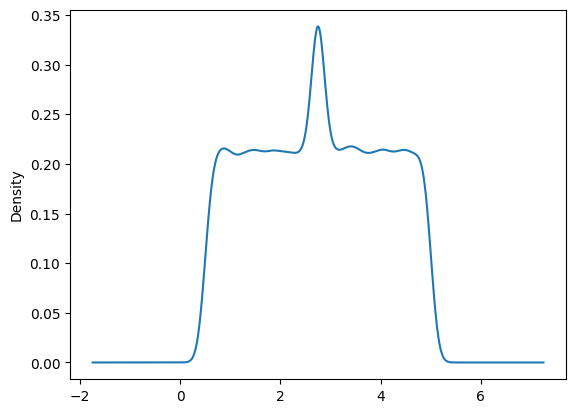

In [107]:
df['Q'].plot(kind='kde')

<Axes: >

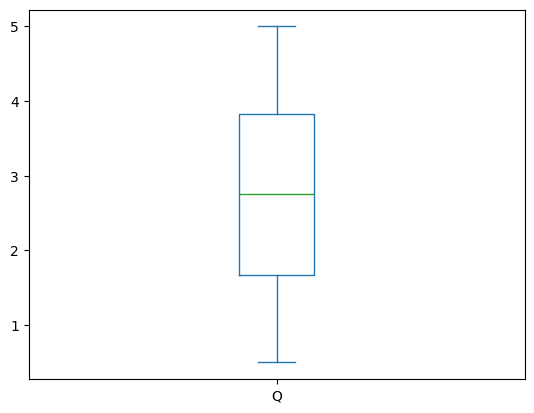

In [108]:
df['Q'].plot(kind='box')

In [109]:
df['Q'].isnull().sum()/len(df['Q'])

0.0

In [110]:
df['dT'].describe()

,dT
count,100000.000000
mean,49.935217
std,28.274229
min,0.000223
25%,26.003391
50%,49.935217
75%,73.932487
max,99.999461


<Axes: ylabel='Frequency'>

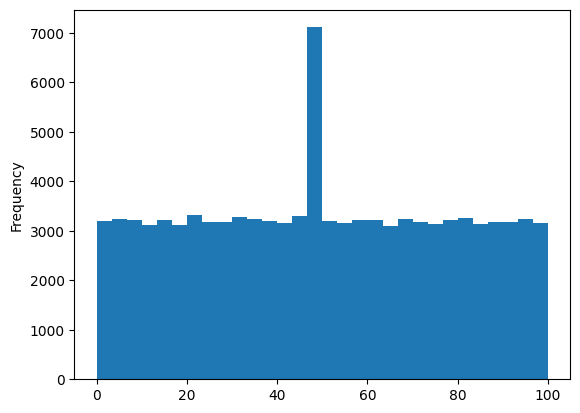

In [111]:
df['dT'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

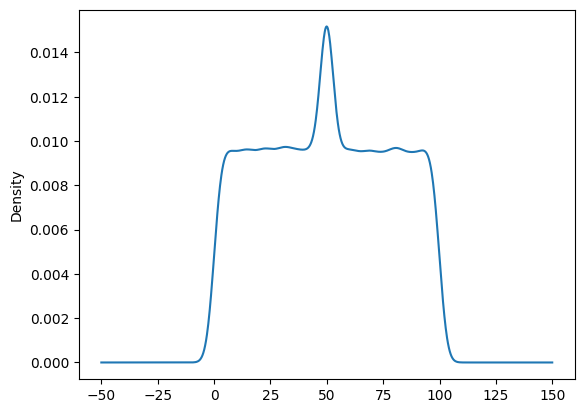

In [112]:
df['dT'].plot(kind='kde')

In [113]:
df['dT'].skew()

0.004046777581206277

<Axes: >

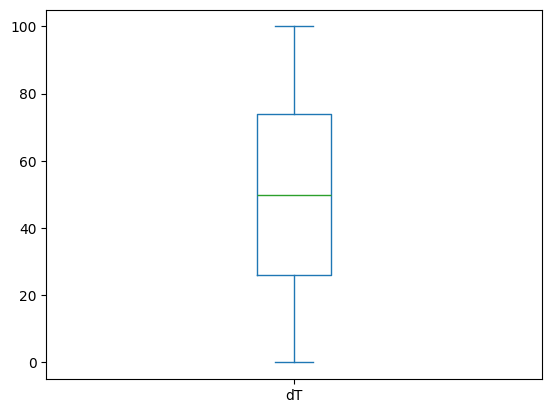

In [114]:
df['dT'].plot(kind='box')

In [115]:
df['dT'].isnull().sum()/len(df['dT'])

0.0

In [116]:
X_ = input.sample(n=1000, random_state=42)
y_ = target[X_.index]
X_ = (X_ + np.mean(X_,axis=0))/(np.std(X_,axis=0))
data = np.array(df)
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = data[:,0:-1]
y = data[:,-1]

In [117]:
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = data[:,0:-1]
y = data[:,-1]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [121]:
import numpy as np

class LinearRegression():
    def __init__(self, lr=0.1, epochs=1000, tau=0.5, clip_value=1.0, batch_size=64, regularization=None, reg_strength=0.01,train_time=0):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.clip_value = clip_value
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.cost_history = []
        self.tau= tau
        self.train_time = 0

    def fit(self, X, y, method='gradient_descent'):
        samples, features = X.shape
        self.weights = np.random.rand(features) * 0.01
        self.bias = 0
        self.descent_methods = {
            'gradient_descent': lambda: self.gradient_descent(X, y),
            'SGD': lambda: self.stochastic_gradient_descent(X, y),
            'mini_batch': lambda: self.mini_batch_descent(X, y)
        }
        self.time_taken = self.descent_methods[method]()

    def compute_gradient(self, X, y):
        samples = X.shape[0]
        y_pred = np.dot(X, self.weights) + self.bias
        dy_pred = y_pred - y
        dW = (1/samples) * (np.dot(X.T, dy_pred))
        db = (1/samples) * np.sum(dy_pred)
        if self.regularization == 'l1':
            dW += self.reg_strength * np.sign(self.weights)
        elif self.regularization == 'l2':
            dW += self.reg_strength * self.weights

        dW = np.clip(dW, -self.clip_value, self.clip_value)
        db = np.clip(db, -self.clip_value, self.clip_value)
        return dW, db


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def cost(self, X, y):
        samples = X.shape[0]
        y_pred = self.predict(X)
        mse = (1/(2*samples)) * np.sum(np.square(y - y_pred))

        if self.regularization == 'l1':
            mse += self.reg_strength * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            mse += 0.5 * self.reg_strength * np.sum(np.square(self.weights))

        return mse

    def gradient_descent(self, X, y):
      start_time = time.time()
      for _ in range(self.epochs):
            dW, db = self.compute_gradient(X, y)
            self.weights -= self.lr * dW
            self.bias -= self.lr * db
            self.cost_history.append(self.cost(X, y))
      end_time = time.time()
      return end_time - start_time

    def stochastic_gradient_descent(self, X, y):
        samples = X.shape[0]
        start_time = time.time()
        for _ in range(self.epochs):
            indices = np.random.permutation(samples)
            for idx in indices:
                X_i = X[idx:idx+1]
                y_i = y[idx:idx+1]
                dW, db = self.compute_gradient(X_i, y_i)
                self.weights -= self.lr * dW
                self.bias -= self.lr * db
                self.cost_history.append(self.cost(X, y))
        end_time = time.time()
        return end_time - start_time

    def mini_batch_descent(self, X, y):
        samples = X.shape[0]
        start_time = time.time()
        for _ in range(self.epochs):
            indices = np.random.permutation(samples)
            for i in range(0, samples, self.batch_size):
                idx = indices[i:min(i+self.batch_size, samples)]
                X_batch = X[idx]
                y_batch = y[idx]
                dW, db = self.compute_gradient(X_batch, y_batch)
                self.weights -= self.lr * dW
                self.bias -= self.lr * db
                self.cost_history.append(self.cost(X, y))
        end_time = time.time()
        return end_time - start_time

    def r2_score(self,y_pred,y):
      y_mean=np.mean(y)
      ss_res=np.sum(np.square(y-y_pred))
      ss_mean=np.sum(np.square(y-y_mean))
      return 1-(ss_res/ss_mean)

    def mae(self,y_pred,y):
       return np.sum(np.abs(y-y_pred))/len(y)

    def plot_cost_history(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.cost_history) + 1), self.cost_history)
        plt.title('Cost Function over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()

    def evaluate_model(self, y, y_pred):
      mse = np.mean((y - y_pred) ** 2)
      rmse = np.sqrt(mse)
      mae = np.mean(np.abs(y - y_pred))
      r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

      return {
          'mse': mse,
          'rmse': rmse,
          'mae': mae,
          'r2': r2
      }
    def weighted_reg_single(self, X, y, x_query):
        m, n = X.shape
        W = np.eye(m)
        for i in range(m):
            W[i, i] = np.exp(-np.sum((X[i] - x_query) ** 2) / (2 * self.tau ** 2))
        theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)

        return x_query @ theta



    def weighted_regression(self,X, y):
      return np.array([self.weighted_reg_single(X, y, x_q) for x_q in X])

In [ ]:
models = [
    LinearRegression(regularization=None),
    LinearRegression(regularization='l1'),
    LinearRegression(regularization='l2'),
]

results = {}
for model in models:
    model.lr = 0.0001
    model.clip_value = 0.1
    model.epochs = 100
    model.reg_strength = 0.0001
    model.fit(X, y, method='mini_batch')
    train_time = model.train_time
    y_pred = model.predict(X_)
    metrics = model.evaluate_model(y_, y_pred)
    metrics['train_time'] = train_time
    results[f'{type(model).__name__}_{model.regularization}'] = metrics

for key, value in results.items():
    print(f'{key}')
    for k, v in value.items():
        print(f'{k} : {v}')
    print('\n')